# CS6140 Assignment 3: Regression Models Part 2
- Student: Sukhrobbek Ilyosbekov

# Test different regression models on the dataset

In this notebook, The different regression models were tested on the dataset that was cleaned in the previous assignment"s notebook. The models that were tested are:

1. Multiple Linear Regression
2. K-Nearest Neighbors
3. Random Forest
4. Gradient Boosted Trees
5. XGBoost
6. CatBoost

---

**Table of Contents**

1. [Step 1: Data Preprocessing and Exploration](#1)
2. [Step 2: Build Regression Models](#2)
    - [2.1 Multiple Linear Regression](#2.1)
    - [2.2 K-Nearest Neighbors](#2.2)
    - [2.3 Random Forest](#2.3)
    - [2.4 Gradient Boosted Trees](#2.4)
    - [2.5 XGBoost](#2.5)
    - [2.6 CatBoost](#2.6)
3. [Step 3: Model Evaluation](#3)
4. [Step 4: Feature Importance](#4)
5. [Step 5: Results Comparison](#5)



## Setup
In order to run this notebook, the following libraries should be installed:
- scikit-learn
- xgboost
- catboost
- pandas
- numpy
- matplotlib
- seaborn

These libraries can be installed using the following command:
```bash
pip install pandas numpy matplotlib seaborn scikit-learn xgboost catboost
```

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_data_path(relative_path: str) -> str:
    """
    Get the absolute path to a file in the `dataset` directory.

    Args:
        relative_path: The path to the file relative to the `dataset` directory including the file name.

    Returns:
        The full path to the file in the `dataset` directory.

    Examples:
        >>> get_data_path("assignment1/boston_listings.csv")
        "C:/Users/username/assignments/dataset/assignment1/boston_listings.csv"
    """
    return os.path.abspath(os.path.join("../../dataset", relative_path))

## Step 1. Data Preprocessing and Exploration <a id="1"></a>

In the previous assignment (notebook1 file), the dataset was aleready cleaned and saved to a file. The follwing steps have been done in the preprocessing step:

1. **Dropping Irrelevant Columns**:
   - Columns that were not relevant to the regression analysis, were dropped to focus on the key variables related to emissions, fuel efficiency, and vehicle characteristics.

2. **Imputing Missing Values**:
   - Missing values in numerical columns were handled using the **KNN Imputer**. The imputer fills in missing values by considering the nearest neighbors in the dataset based on similarity in feature space, ensuring that the imputed values maintain consistency with the existing data patterns.
   
3. **Outlier Detection and Removal**:
   - Outliers were detected using the **IsolationForest** method, which is designed to identify anomalous data points that deviate from the general distribution. Removed 5% of the data that were considered anomalous, preventing extreme values from distorting the regression analysis.
   
4. **Encoding Categorical Variables**:
   - Categorical variables were encoded using **OneHotEncoder**, converting them into binary columns. 

In [3]:
data = pd.read_csv(get_data_path("assignment3/vehicles_data.csv"))

display(data.head())
display(data.info())

,model_year,vehicle_manufacturer_name,represented_test_veh_model,test_veh_displacement_l,rated_horsepower,equivalent_test_weight_lbs,axle_ratio,n_v_ratio,shift_indicator_light_use_cd,test_procedure_cd,...,tested_transmission_type_Continuously Variable,tested_transmission_type_Manual,tested_transmission_type_Other,tested_transmission_type_Selectable Continuously Variable (e.g. CVT with paddles),tested_transmission_type_Semi-Automatic,transmission_lockup_Y,test_category_FTP,test_category_HWY,test_category_SC03,test_category_US06
0,2015,aston martin,DB9,0.349398,1.399203,0.120612,-0.135910,-0.042358,-0.182084,-0.163751,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,2015,aston martin,DB9,0.349398,1.399203,0.120612,-0.135910,-0.042358,-0.182084,-0.750387,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,2015,aston martin,Rapide S,0.363321,1.676468,0.411694,-0.768489,-0.229117,-0.182084,-0.750387,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,2015,aston martin,V12 Vantage S,0.363321,1.762288,-0.170471,0.098058,0.014104,1.812381,-0.163751,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,2015,aston martin,V12 Vantage S,0.363321,1.762288,-0.170471,0.098058,0.014104,1.812381,-0.750387,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43206 entries, 0 to 43205
Data columns (total 55 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   model_year                                                                                  43206 non-null  int64  
 1   vehicle_manufacturer_name                                                                   43206 non-null  object 
 2   represented_test_veh_model                                                                  43206 non-null  object 
 3   test_veh_displacement_l                                                                     43206 non-null  float64
 4   rated_horsepower                                                                            43206 non-null  float64
 5   equivalent_test_weight_lbs             

None

### Split the dataset into training and testing datasets

The data was separated into:
- `X1`: The feature variables for predicting mileage per gallon (RND_ADJ_FE).
- `X2`: The feature variables for predicting CO emissions.
- `y1`: The first target variable for predicting mileage per gallon (RND_ADJ_FE).
- `y2`: The second target variable for predicting CO emissions.

The data was split into training (80%) and test (20%) sets for both target variables, using a consistent random state for reproducibility.

In [4]:
from sklearn.model_selection import train_test_split

descriptive_columns = ["model_year", "vehicle_manufacturer_name", "represented_test_veh_model", "transmission_lockup_Y"]
tested_transmission_type_columns = [col for col in data.columns if col.startswith("tested_transmission_type")]
test_category_columns = [col for col in data.columns if col.startswith("test_category")]
drive_system_code_columns = [col for col in data.columns if col.startswith("drive_system_code")]
vehicle_type_columns = [col for col in data.columns if col.startswith("vehicle_type")]

# Features are columns
# Drop target columns as well as columns that are not useful for prediction
X1 = data.drop(columns=[
    *descriptive_columns,
    *tested_transmission_type_columns,
    *test_category_columns,
    *drive_system_code_columns,
    *vehicle_type_columns,
    "rnd_adj_fe"
])

# Features for CO emissions
X2 = data.drop(columns=[
    *descriptive_columns,
    *tested_transmission_type_columns,
    *test_category_columns,
    *drive_system_code_columns,
    *vehicle_type_columns,
    "co_g_mi",
])

# Target 1 is rnd_adj_fe which is the fuel efficiency of the vehicle
y1 = data["rnd_adj_fe"] 

# Target 2 is co_g_mi which is the CO emissions
y2 = data["co_g_mi"] 

# Splitting the data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Specifying data types
X_train_1: pd.DataFrame
X_test_1: pd.DataFrame
X_train_2: pd.DataFrame
X_test_2: pd.DataFrame

print("Train set shape (rnd_adj_fe):", X_train_1.shape)
print("Test set shape (rnd_adj_fe):", X_test_1.shape)
print("Train set shape (co):", X_train_2.shape)
print("Test set shape (co):", X_test_2.shape)

print("Train set few rows (rnd_adj_fe):")
display(X_train_1.head())
display(X_train_1.info())

print("Train set few rows (co):")
display(X_train_2.head())
display(X_train_2.info())

Train set shape (rnd_adj_fe): (34564, 26)
Test set shape (rnd_adj_fe): (8642, 26)
Train set shape (co): (34564, 26)
Test set shape (co): (8642, 26)
Train set few rows (rnd_adj_fe):


,test_veh_displacement_l,rated_horsepower,equivalent_test_weight_lbs,axle_ratio,n_v_ratio,shift_indicator_light_use_cd,test_procedure_cd,test_fuel_type_cd,thc_g_mi,co_g_mi,...,fe_bag_3,dt_inertia_work_ratio_rating,dt_absolute_speed_change_ratg,dt_energy_economy_rating,target_coef_a_lbf,target_coef_b_lbf_mph,target_coef_c_lbf_mph2,set_coef_a_lbf,set_coef_b_lbf_mph,set_coef_c_lbf_mph2
19301,0.391165,1.036118,-0.607094,-0.768489,-0.213915,-0.182084,-0.750387,0.361625,-0.398725,-0.059304,...,0.098252,-0.012996,-0.047428,-0.256050,1.136539,0.142004,-0.209129,2.076558,-0.698941,-0.012076
28181,-0.096112,0.078894,1.284942,-0.170572,-0.196543,-0.182084,-0.750387,0.361625,-0.019987,0.180777,...,-0.410552,-0.109681,-0.148275,-0.264230,1.432967,1.012953,1.868533,1.974716,-1.615628,0.176418
29638,-0.193568,-0.330402,0.120612,0.912613,0.235609,-0.182084,-0.750387,0.361625,-0.398072,-0.085559,...,-0.142356,-0.350375,-0.338236,-0.276306,1.569542,0.247585,0.118054,4.154216,0.669859,0.000466
39884,-0.193568,-0.185168,0.411694,-0.144575,-0.161797,-0.182084,2.085022,0.361625,0.149735,0.339474,...,-0.294143,-0.544410,-0.400835,-0.317096,-0.068434,0.007081,1.699324,0.272632,0.113547,0.108910
9697,-0.193568,-0.924541,-1.189259,-0.560518,0.105312,-0.182084,-0.163751,0.361625,0.426894,0.447387,...,0.099626,-0.350627,-0.334313,-0.291716,-1.502008,0.158443,0.222215,-0.326640,0.013033,0.005961


<class 'pandas.core.frame.DataFrame'>
Index: 34564 entries, 19301 to 15795
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   test_veh_displacement_l        34564 non-null  float64
 1   rated_horsepower               34564 non-null  float64
 2   equivalent_test_weight_lbs     34564 non-null  float64
 3   axle_ratio                     34564 non-null  float64
 4   n_v_ratio                      34564 non-null  float64
 5   shift_indicator_light_use_cd   34564 non-null  float64
 6   test_procedure_cd              34564 non-null  float64
 7   test_fuel_type_cd              34564 non-null  float64
 8   thc_g_mi                       34564 non-null  float64
 9   co_g_mi                        34564 non-null  float64
 10  co2_g_mi                       34564 non-null  float64
 11  nox_g_mi                       34564 non-null  float64
 12  ch4_g_mi                       34564 non-null  

None

Train set few rows (co):


,test_veh_displacement_l,rated_horsepower,equivalent_test_weight_lbs,axle_ratio,n_v_ratio,shift_indicator_light_use_cd,test_procedure_cd,test_fuel_type_cd,thc_g_mi,co2_g_mi,...,fe_bag_3,dt_inertia_work_ratio_rating,dt_absolute_speed_change_ratg,dt_energy_economy_rating,target_coef_a_lbf,target_coef_b_lbf_mph,target_coef_c_lbf_mph2,set_coef_a_lbf,set_coef_b_lbf_mph,set_coef_c_lbf_mph2
19301,0.391165,1.036118,-0.607094,-0.768489,-0.213915,-0.182084,-0.750387,0.361625,-0.398725,-0.321200,...,0.098252,-0.012996,-0.047428,-0.256050,1.136539,0.142004,-0.209129,2.076558,-0.698941,-0.012076
28181,-0.096112,0.078894,1.284942,-0.170572,-0.196543,-0.182084,-0.750387,0.361625,-0.019987,0.032888,...,-0.410552,-0.109681,-0.148275,-0.264230,1.432967,1.012953,1.868533,1.974716,-1.615628,0.176418
29638,-0.193568,-0.330402,0.120612,0.912613,0.235609,-0.182084,-0.750387,0.361625,-0.398072,-0.443648,...,-0.142356,-0.350375,-0.338236,-0.276306,1.569542,0.247585,0.118054,4.154216,0.669859,0.000466
39884,-0.193568,-0.185168,0.411694,-0.144575,-0.161797,-0.182084,2.085022,0.361625,0.149735,1.039933,...,-0.294143,-0.544410,-0.400835,-0.317096,-0.068434,0.007081,1.699324,0.272632,0.113547,0.108910
9697,-0.193568,-0.924541,-1.189259,-0.560518,0.105312,-0.182084,-0.163751,0.361625,0.426894,-0.035221,...,0.099626,-0.350627,-0.334313,-0.291716,-1.502008,0.158443,0.222215,-0.326640,0.013033,0.005961


<class 'pandas.core.frame.DataFrame'>
Index: 34564 entries, 19301 to 15795
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   test_veh_displacement_l        34564 non-null  float64
 1   rated_horsepower               34564 non-null  float64
 2   equivalent_test_weight_lbs     34564 non-null  float64
 3   axle_ratio                     34564 non-null  float64
 4   n_v_ratio                      34564 non-null  float64
 5   shift_indicator_light_use_cd   34564 non-null  float64
 6   test_procedure_cd              34564 non-null  float64
 7   test_fuel_type_cd              34564 non-null  float64
 8   thc_g_mi                       34564 non-null  float64
 9   co2_g_mi                       34564 non-null  float64
 10  nox_g_mi                       34564 non-null  float64
 11  ch4_g_mi                       34564 non-null  float64
 12  n2o_g_mi                       34564 non-null  

None

## Step 2. Build Regression Models <a id="2"></a>

The following regression models were intialized and trained on the training data:
1. Multiple Linear Regression
2. K-Nearest Neighbors (KNN)
3. Random Forest
4. Gradient Boosting
5. XGBoost
6. CatBoost

Each model is initialized with a consistent random state for reproducibility.

In [52]:
def plot_actual_vs_predicted(y_actual: np.ndarray, y_pred: np.ndarray, model_name: str, target_variable: str) -> None:
    """
    Plots a scatter plot comparing actual vs. predicted values for a given model and target variable.
    
    Parameters:
    - y_actual: The actual values from the test set.
    - y_pred: The predicted values from the model.
    - model_name: Name of the model used for predictions.
    - target_variable: Name of the target variable (e.g., 'RND_ADJ_FE' or 'CO Emissions').
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_actual, y=y_pred, alpha=0.5)

    # Add 45-degree reference line
    min_value = min(y_actual.min(), y_pred.min())
    max_value = max(y_actual.max(), y_pred.max())
    plt.plot([min_value, max_value], [min_value, max_value], "k--", lw=2)

    # Limit to the main data range for better visualization
    x_limit = np.percentile(y_actual, 95)
    y_limit = np.percentile(y_pred, 95)
    plt.xlim(0, x_limit)
    plt.ylim(0, y_limit)

    plt.xlabel(f"Actual {target_variable}")
    plt.ylabel(f"Predicted {target_variable}")
    plt.title(f"{model_name} - Actual vs Predicted for {target_variable}")
    plt.show()

### Multiple Linear Regression <a id="2.1"></a>

Linear model R^2 score for rnd_adj_fe: -0.011424303834312255
Linear model R^2 score for co: 0.007923117750505582


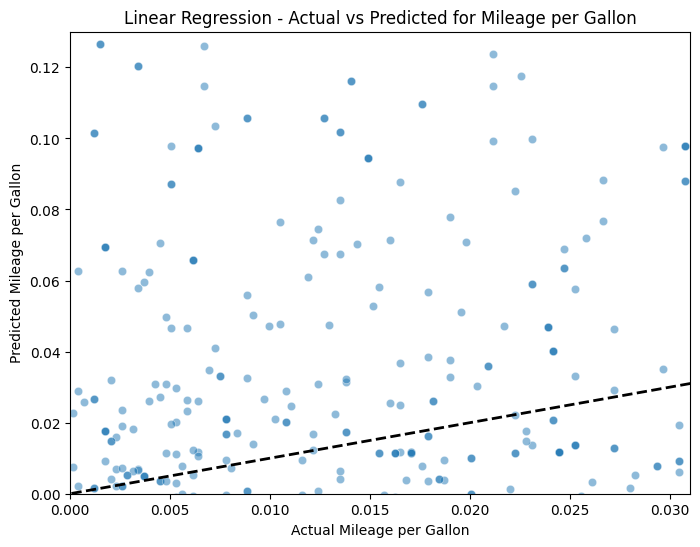

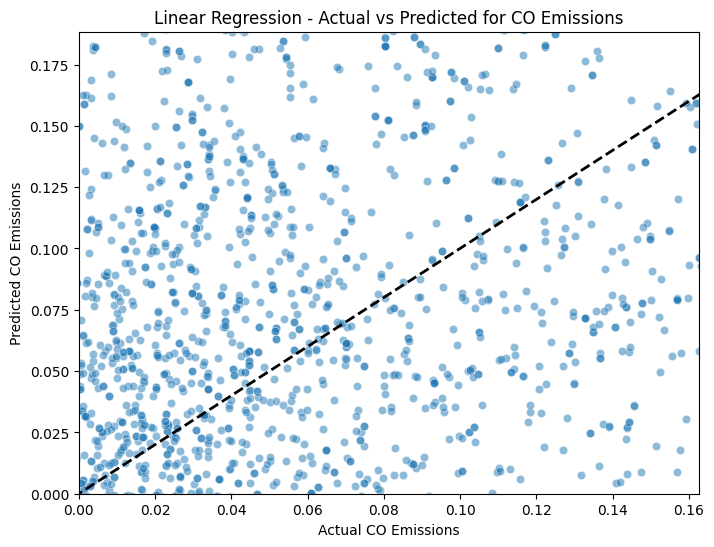

In [53]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_model_1 = LinearRegression(n_jobs=-1)
linear_model_2 = LinearRegression(n_jobs=-1)

# Train the model on rnd_adj_fe
linear_model_1.fit(X_train_1, y_train_1)

# Predict on the test set for rnd_adj_fe
y_pred_1 = linear_model_1.predict(X_test_1)
r_score_linear_1 = linear_model_1.score(X_test_1, y_test_1)

# Train the model on co_g_mi
linear_model_2.fit(X_train_2, y_train_2)

# Predict on the test set for co_g_mi
y_pred_2 = linear_model_2.predict(X_test_2)
r_score_linear_2 = linear_model_2.score(X_test_2, y_test_2)

print("Linear model R^2 score for rnd_adj_fe:", r_score_linear_1)
print("Linear model R^2 score for co:", r_score_linear_2)

# Plot the predicted values against the true values
plot_actual_vs_predicted(y_test_1, y_pred_1, "Linear Regression", "Mileage per Gallon")
plot_actual_vs_predicted(y_test_2, y_pred_2, "Linear Regression", "CO Emissions")

### K-Nearest Neighbors <a id="2.2"></a>

KNN model R^2 score for rnd_adj_fe: -0.12120393529007734
KNN model R^2 score for co: 0.6610816799598973


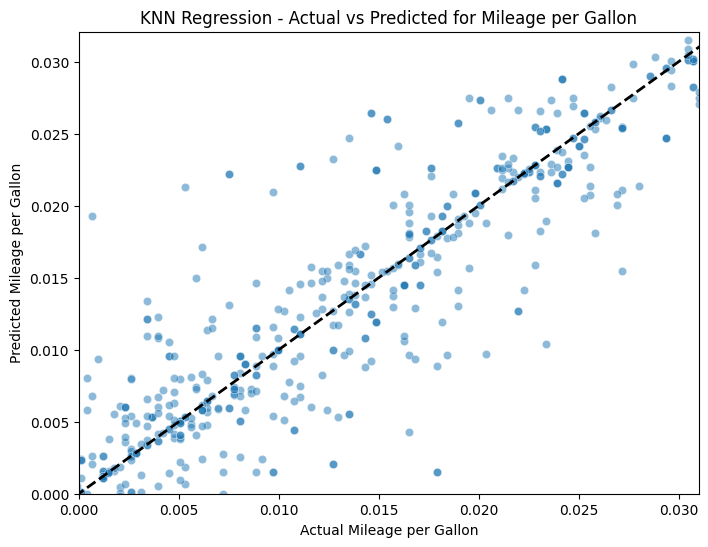

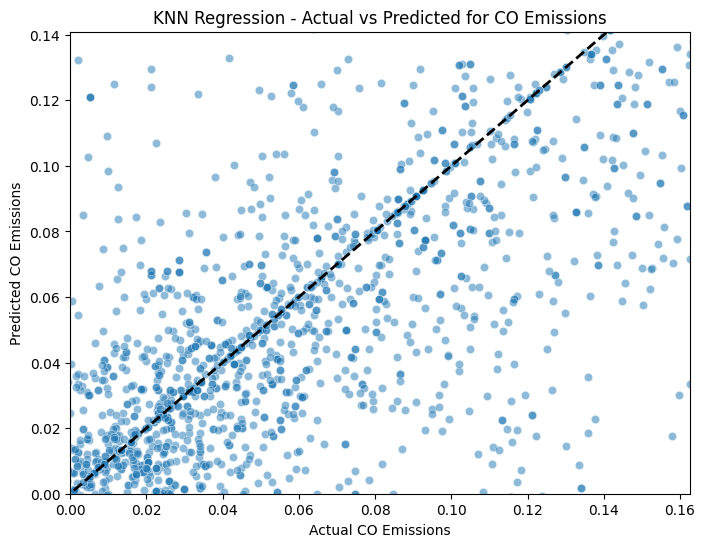

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knn_model_1 = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
knn_model_2 = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

# Train the model on rnd_adj_fe and predict
knn_model_1.fit(X_train_1, y_train_1)
y_pred_knn_1 = knn_model_1.predict(X_test_1)
r_score_knn_1 = knn_model_1.score(X_test_1, y_test_1)

# Train the model on co and predict
knn_model_2.fit(X_train_2, y_train_2)
y_pred_knn_2 = knn_model_2.predict(X_test_2)
r_score_knn_2 = knn_model_2.score(X_test_2, y_test_2)

print("KNN model R^2 score for rnd_adj_fe:", r_score_knn_1)
print("KNN model R^2 score for co:", r_score_knn_2)

# Plot the predicted values against the true values
plot_actual_vs_predicted(y_test_1, y_pred_knn_1, "KNN Regression", "Mileage per Gallon")
plot_actual_vs_predicted(y_test_2, y_pred_knn_2, "KNN Regression", "CO Emissions")

#### Hyperparameter Tuning for KNN

In [6]:
from sklearn.model_selection import GridSearchCV

knn_param_grid = {
    "n_neighbors": [5, 7, 11],
    "weights": ["uniform", "distance"]
}

# KNN for RND_ADJ_FE
knn_model_1 = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=3, scoring="r2", n_jobs=-1)
knn_model_1.fit(X_train_1, y_train_1)
knn_model_1_best = knn_model_1.best_estimator_
knn_model_1_results = pd.DataFrame(knn_model_1.cv_results_)

# KNN for CO
knn_model_2 = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=3, scoring="r2", n_jobs=-1)
knn_model_2.fit(X_train_2, y_train_2)
knn_model_2_best = knn_model_2.best_estimator_
knn_model_2_results = pd.DataFrame(knn_model_2.cv_results_)

print("Best parameters for KNN (RND_ADJ_FE):", knn_model_1.best_params_)
print("Best R^2 for KNN (RND_ADJ_FE):", knn_model_1.best_score_)
display(knn_model_1_results)

print("Best parameters for KNN (CO):", knn_model_2.best_params_)
print("Best R^2 for KNN (CO):", knn_model_2.best_score_)
display(knn_model_2_results)

Best parameters for KNN (RND_ADJ_FE): {'n_neighbors': 11, 'weights': 'distance'}
Best R^2 for KNN (RND_ADJ_FE): 0.7098112298028235


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033690,0.002274,6.512673,1.059856,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.611705,0.379956,0.535467,0.509043,0.096439,4
1,0.030140,0.005025,7.067115,1.510632,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.736523,0.566353,0.795500,0.699459,0.097151,3
2,0.024557,0.001224,7.404584,0.938674,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.530033,0.395226,0.447871,0.457710,0.055473,5
3,0.028728,0.004579,8.546422,0.815966,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.733769,0.610051,0.780706,0.708175,0.071982,2
4,0.035359,0.006150,8.047700,0.939138,11,uniform,"{'n_neighbors': 11, 'weights': 'uniform'}",0.403158,0.374956,0.386233,0.388115,0.011590,6
5,0.028793,0.001415,5.023590,1.206464,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",0.697536,0.646929,0.784969,0.709811,0.057019,1


Best parameters for KNN (CO): {'n_neighbors': 5, 'weights': 'distance'}
Best R^2 for KNN (CO): 0.832682584294968


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018773,0.001249,5.240009,0.334049,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.622100,0.423402,0.799125,0.614876,0.153473,4
1,0.019911,0.001657,5.114691,0.064029,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.997973,0.503520,0.996555,0.832683,0.232754,1
2,0.024063,0.001556,5.334845,0.283571,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.432993,0.340862,0.535875,0.436577,0.079654,5
3,0.025906,0.001779,5.157660,0.031689,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.997903,0.503516,0.986117,0.829178,0.230329,3
4,0.050928,0.022978,5.516557,0.207174,11,uniform,"{'n_neighbors': 11, 'weights': 'uniform'}",0.311525,0.240487,0.404360,0.318791,0.067098,6
5,0.027297,0.000601,3.171387,1.426185,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",0.997729,0.503460,0.990790,0.830660,0.231382,2


### Random Forest <a id="2.3"></a>

Random Forest model R^2 score for rnd_adj_fe: 0.07993632481325386
Random Forest model R^2 score for co: 0.9070628450042216


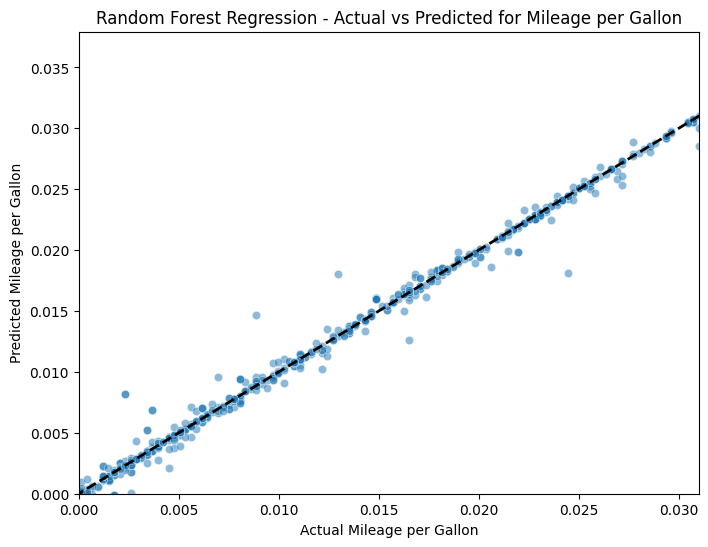

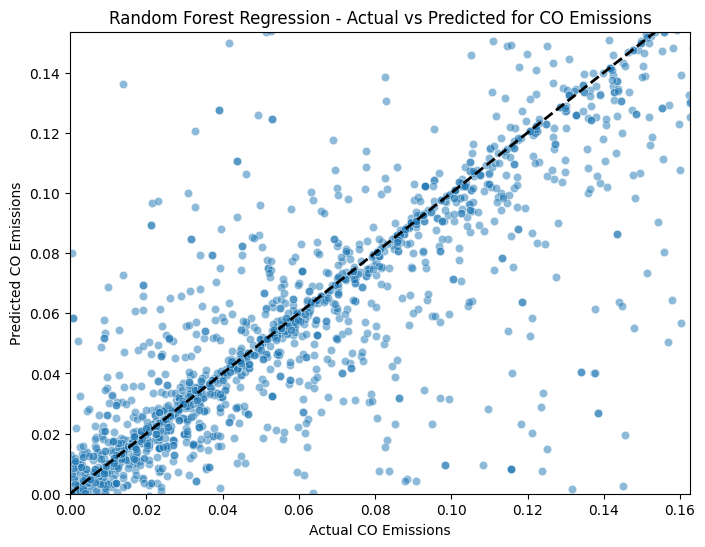

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_model_1 = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_model_2 = RandomForestRegressor(n_jobs=-1, random_state=42)

# Train and predict for rnd_adj_fe
rf_model_1.fit(X_train_1, y_train_1)
y_pred_rf_1 = rf_model_1.predict(X_test_1)
r_score_rf_1 = rf_model_1.score(X_test_1, y_test_1)

# Train and predict for co
rf_model_2.fit(X_train_2, y_train_2)
y_pred_rf_2 = rf_model_2.predict(X_test_2)
r_score_rf_2 = rf_model_2.score(X_test_2, y_test_2)

print("Random Forest model R^2 score for rnd_adj_fe:", r_score_rf_1)
print("Random Forest model R^2 score for co:", r_score_rf_2)

plot_actual_vs_predicted(y_test_1, y_pred_rf_1, "Random Forest Regression", "Mileage per Gallon")
plot_actual_vs_predicted(y_test_2, y_pred_rf_2, "Random Forest Regression", "CO Emissions")

#### Hyperparameter Tuning for Random Forest

In [8]:
from sklearn.model_selection import RandomizedSearchCV

rf_param_dist = {
    "n_estimators": [100, 150, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


rf_model_1 = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=5,  # Number of random combinations to try
    cv=3,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)
rf_model_1.fit(X_train_1, y_train_1)
rf_model_1_best = rf_model_1.best_estimator_
rf_model_1_results = pd.DataFrame(rf_model_1.cv_results_)

# Random Forest for CO
rf_model_2 = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=5,  # Number of random combinations to try
    cv=3,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)
rf_model_2.fit(X_train_2, y_train_2)
rf_model_2_best = rf_model_2.best_estimator_
rf_model_2_results = pd.DataFrame(rf_model_2.cv_results_)

print("Best parameters for Random Forest (RND_ADJ_FE):", rf_model_1.best_params_)
print("Best R^2 for Random Forest (RND_ADJ_FE):", rf_model_1.best_score_)
display(rf_model_1_results)

print("Best parameters for Random Forest (CO):", rf_model_2.best_params_)
print("Best R^2 for Random Forest (CO):", rf_model_2.best_score_)
display(rf_model_2_results)

Best parameters for Random Forest (RND_ADJ_FE): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best R^2 for Random Forest (RND_ADJ_FE): 0.7759290204157591


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,75.428708,0.971675,0.183193,0.005675,100,5,1,10,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.924199,0.633855,0.761881,0.773312,0.118808,2
1,134.058046,0.544309,0.382919,0.039399,100,2,1,None,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.929116,0.643827,0.754844,0.775929,0.117419,1
2,159.244444,0.333554,0.356299,0.051057,150,5,4,None,"{'n_estimators': 150, 'min_samples_split': 5, ...",0.890832,0.641159,0.729548,0.753846,0.103367,5
3,109.576767,0.492475,0.221524,0.011707,150,5,1,10,"{'n_estimators': 150, 'min_samples_split': 5, ...",0.919116,0.637674,0.756209,0.771000,0.115373,3
4,122.646683,0.189394,0.443341,0.012876,100,2,4,None,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.897977,0.639884,0.731088,0.756316,0.106866,4


Best parameters for Random Forest (CO): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best R^2 for Random Forest (CO): 0.6910406927902644


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,69.343736,1.304884,0.209607,0.000373,100,5,1,10,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.650579,0.394554,0.538216,0.527783,0.104782,3
1,121.619461,0.236335,0.532715,0.030111,100,2,1,None,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.753820,0.457167,0.862135,0.691041,0.171184,1
2,140.850113,0.813428,0.356838,0.056049,150,5,4,None,"{'n_estimators': 150, 'min_samples_split': 5, ...",0.509917,0.264939,0.590869,0.455242,0.138563,4
3,101.521031,0.100802,0.340547,0.003042,150,5,1,10,"{'n_estimators': 150, 'min_samples_split': 5, ...",0.667872,0.375513,0.545356,0.529580,0.119875,2
4,107.246869,0.318384,0.409165,0.018127,100,2,4,None,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.515769,0.254221,0.567578,0.445856,0.137147,5


### Gradient Boosting <a id="2.4"></a>

Gradient Boosting model R^2 score for rnd_adj_fe: 0.7143955683925552
Gradient Boosting model R^2 score for co: 0.8749013054149268


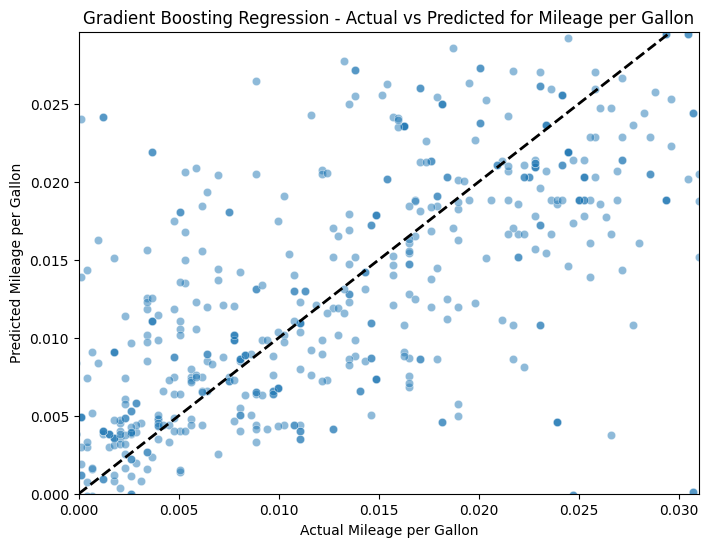

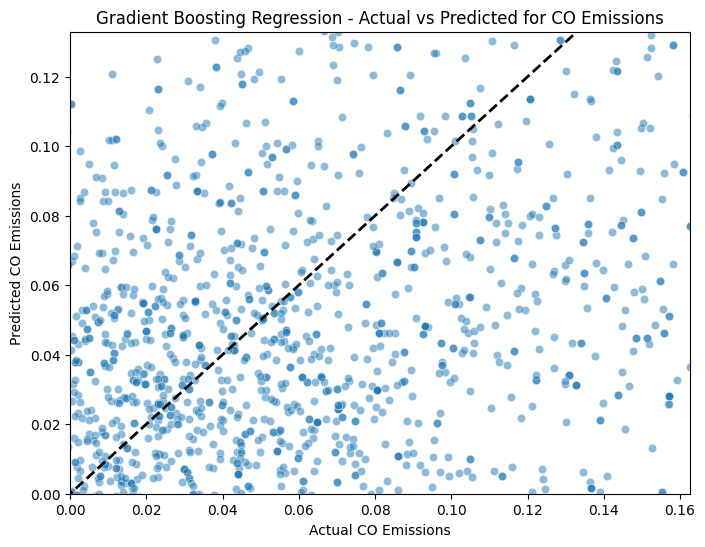

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model_1 = GradientBoostingRegressor(random_state=42)
gb_model_2 = GradientBoostingRegressor(random_state=42)

# Train and predict for rnd_adj_fe
gb_model_1.fit(X_train_1, y_train_1)
y_pred_gb_1 = gb_model_1.predict(X_test_1)
r_score_gb_1 = gb_model_1.score(X_test_1, y_test_1)

# Train and predict for co
gb_model_2.fit(X_train_2, y_train_2)
y_pred_gb_2 = gb_model_2.predict(X_test_2)
r_score_gb_2 = gb_model_2.score(X_test_2, y_test_2)

print("Gradient Boosting model R^2 score for rnd_adj_fe:", r_score_gb_1)
print("Gradient Boosting model R^2 score for co:", r_score_gb_2)

plot_actual_vs_predicted(y_test_1, y_pred_gb_1, "Gradient Boosting Regression", "Mileage per Gallon")
plot_actual_vs_predicted(y_test_2, y_pred_gb_2, "Gradient Boosting Regression", "CO Emissions")

#### Hyperparameter Tuning for Gradient Boosting

In [10]:
gb_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

# Gradient Boosting for RND_ADJ_FE
gb_model_1 = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=3, scoring="r2", n_jobs=-1)
gb_model_1.fit(X_train_1, y_train_1)
gb_model_1_best = gb_model_1.best_estimator_
gb_model_1_results = pd.DataFrame(gb_model_1.cv_results_)

# Gradient Boosting for CO
gb_model_2 = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=3, scoring="r2", n_jobs=-1)
gb_model_2.fit(X_train_2, y_train_2)
gb_model_2_best = gb_model_2.best_estimator_
gb_model_2_results = pd.DataFrame(gb_model_2.cv_results_)

print("Best parameters for Gradient Boosting (RND_ADJ_FE):", gb_model_1.best_params_)
print("Best R^2 for Gradient Boosting (RND_ADJ_FE):", gb_model_1.best_score_)
display(gb_model_1_results)

print("Best parameters for Gradient Boosting (CO):", gb_model_2.best_params_)
print("Best R^2 for Gradient Boosting (CO):", gb_model_2.best_score_)
display(gb_model_2_results)

Best parameters for Gradient Boosting (RND_ADJ_FE): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best R^2 for Gradient Boosting (RND_ADJ_FE): 0.9313481712300113


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,37.220061,1.618963,0.039806,0.005874,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.657405,0.581529,0.698975,0.645970,0.048624,18
1,79.676365,1.534841,0.065567,0.005441,0.01,3,200,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.860708,0.821897,0.906236,0.862947,0.034468,5
2,64.982663,1.583354,0.055902,0.005742,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.838476,0.544708,0.677481,0.686889,0.120115,16
3,119.345166,2.551324,0.108942,0.011326,0.01,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.958424,0.610017,0.831670,0.800037,0.143985,14
4,86.512114,5.758279,0.086581,0.007117,0.01,7,100,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.808750,0.513435,0.680656,0.667614,0.120914,17
5,163.308215,4.241404,0.172408,0.044004,0.01,7,200,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.958901,0.646598,0.771649,0.792383,0.128338,15
6,33.582247,0.485130,0.039414,0.002893,0.10,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.986848,0.815903,0.968370,0.923707,0.076601,3
7,69.836365,2.682389,0.064384,0.011474,0.10,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.993119,0.825352,0.975573,0.931348,0.075292,1
8,59.063554,2.057073,0.112987,0.085166,0.10,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.995119,0.650658,0.920681,0.855486,0.147989,7
9,116.873914,6.973731,0.111829,0.028092,0.10,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.995202,0.651536,0.921922,0.856220,0.147793,6


Best parameters for Gradient Boosting (CO): {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best R^2 for Gradient Boosting (CO): 0.8233191462529809


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,32.581664,2.190454,0.046247,0.006384,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.797023,0.431742,0.845031,0.691265,0.184555,6
1,65.415864,2.131285,0.103263,0.021165,0.01,3,200,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.847744,0.490242,0.953235,0.763740,0.198129,5
2,63.488305,6.146047,0.142613,0.040376,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.568174,0.433574,0.855914,0.619221,0.176157,12
3,122.086423,5.978967,0.152879,0.021399,0.01,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.456864,0.492312,0.969743,0.639640,0.233866,9
4,82.502946,3.456769,0.114297,0.007329,0.01,7,100,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.564349,0.434750,0.858723,0.619274,0.177390,11
5,164.540928,8.241964,0.301159,0.078900,0.01,7,200,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.439500,0.493578,0.975125,0.636067,0.240764,10
6,38.587202,3.443450,0.048565,0.006059,0.10,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.924347,0.501720,0.985728,0.803932,0.215160,4
7,66.676274,1.655406,0.069006,0.007028,0.10,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.926168,0.502325,0.985759,0.804751,0.215227,3
8,59.813326,5.536584,0.060004,0.004274,0.10,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.128934,0.503116,0.979853,0.537301,0.348226,18
9,128.842412,4.940509,0.130107,0.029837,0.10,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.129110,0.503492,0.980466,0.537689,0.348405,17


### XGBoost <a id="2.5"></a>

XGBoost model R^2 score for rnd_adj_fe: 0.8001001196422542
XGBoost model R^2 score for co: 0.5300302056169922


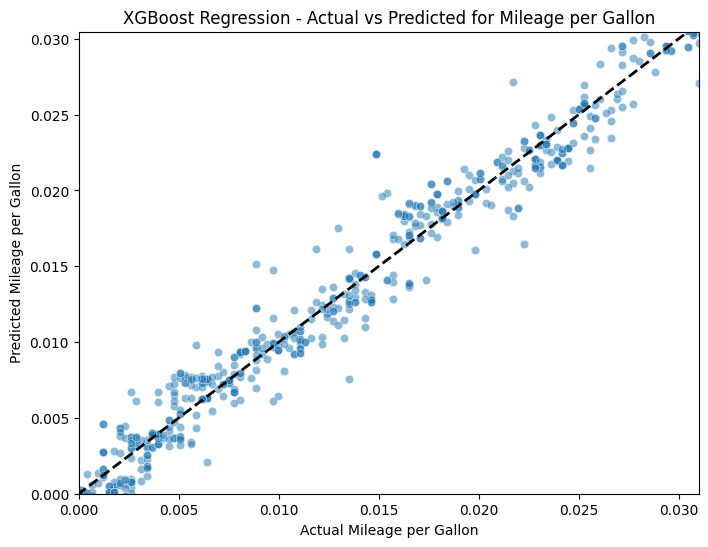

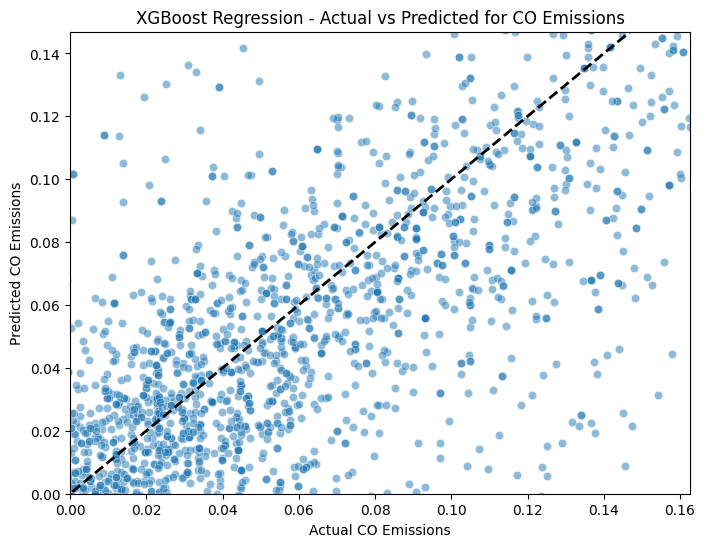

In [43]:
from xgboost import XGBRegressor

xgb_model_1 = XGBRegressor(n_jobs=-1, random_state=42)
xgb_model_2 = XGBRegressor(n_jobs=-1, random_state=42)

# Train and predict for rnd_adj_fe
xgb_model_1.fit(X_train_1, y_train_1)
y_pred_xgb_1 = xgb_model_1.predict(X_test_1)
r_score_xgb_1 = xgb_model_1.score(X_test_1, y_test_1)

# Train and predict for co
xgb_model_2.fit(X_train_2, y_train_2)
y_pred_xgb_2 = xgb_model_2.predict(X_test_2)
r_score_xgb_2 = xgb_model_2.score(X_test_2, y_test_2)

print("XGBoost model R^2 score for rnd_adj_fe:", r_score_xgb_1)
print("XGBoost model R^2 score for co:", r_score_xgb_2)

plot_actual_vs_predicted(y_test_1, y_pred_xgb_1, "XGBoost Regression", "Mileage per Gallon")
plot_actual_vs_predicted(y_test_2, y_pred_xgb_2, "XGBoost Regression", "CO Emissions")

#### Hyperparameter Tuning for XGBoost

In [12]:
xgb_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

# XGBoost for RND_ADJ_FE
xgb_model_1 = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=3, scoring="r2", n_jobs=-1)
xgb_model_1.fit(X_train_1, y_train_1)
xgb_model_1_best = xgb_model_1.best_estimator_
xgb_model_1_results = pd.DataFrame(xgb_model_1.cv_results_)

# XGBoost for CO
xgb_model_2 = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=3, scoring="r2", n_jobs=-1)
xgb_model_2.fit(X_train_2, y_train_2)
xgb_model_2_best = xgb_model_2.best_estimator_
xgb_model_2_results = pd.DataFrame(xgb_model_2.cv_results_)

print("Best parameters for XGBoost (RND_ADJ_FE):", xgb_model_1.best_params_)
print("Best R^2 for XGBoost (RND_ADJ_FE):", xgb_model_1.best_score_)
display(xgb_model_1_results)

print("Best parameters for XGBoost (CO):", xgb_model_2.best_params_)
print("Best R^2 for XGBoost (CO):", xgb_model_2.best_score_)
display(xgb_model_2_results)

Best parameters for XGBoost (RND_ADJ_FE): {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best R^2 for XGBoost (RND_ADJ_FE): 0.9704976769246799


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.402177,0.308578,0.072874,0.022846,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.812156,0.559750,0.676095,0.682667,0.103149,17
1,3.743114,0.100678,0.133471,0.019486,0.01,3,200,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.924901,0.822512,0.876899,0.874771,0.041827,13
2,4.829708,0.497330,0.162037,0.039549,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.783355,0.582416,0.652795,0.672856,0.083250,18
3,6.905959,0.717829,0.272502,0.040100,0.01,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.949110,0.799751,0.862910,0.870591,0.061217,14
4,7.522100,0.382122,0.224320,0.048694,0.01,7,100,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.748322,0.672425,0.646401,0.689050,0.043237,16
5,8.546294,2.762630,0.336801,0.010049,0.01,7,200,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.917447,0.838117,0.815274,0.856946,0.043785,15
6,1.166404,0.016522,0.080919,0.010195,0.10,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.990046,0.911519,0.968838,0.956801,0.033169,6
7,1.994205,0.058616,0.125555,0.003147,0.10,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.990775,0.917836,0.980923,0.963178,0.032313,5
8,2.196275,0.424464,0.138317,0.023670,0.10,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.983895,0.879614,0.935001,0.932837,0.042600,12
9,3.819037,0.549671,0.199707,0.018174,0.10,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.984121,0.880387,0.937764,0.934090,0.042429,11


Best parameters for XGBoost (CO): {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best R^2 for XGBoost (CO): 0.8319521222495911


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.083479,0.081862,0.074897,0.001966,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.727351,0.388143,0.760152,0.625215,0.168169,18
1,1.791363,0.097406,0.119528,0.006579,0.01,3,200,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.917551,0.474649,0.927657,0.773285,0.211208,13
2,1.857032,0.087124,0.107725,0.006327,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.734169,0.390115,0.770145,0.631476,0.171299,17
3,3.573313,0.036607,0.195122,0.005942,0.01,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.926831,0.476710,0.941484,0.781675,0.215726,12
4,4.615690,0.138522,0.185832,0.022087,0.01,7,100,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.735392,0.391313,0.772846,0.633184,0.171710,16
5,7.914215,0.509854,0.300730,0.015270,0.01,7,200,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.928281,0.478200,0.944529,0.783670,0.216101,11
6,1.203063,0.178212,0.084051,0.010600,0.10,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.915938,0.500923,0.987596,0.801486,0.214534,9
7,1.838416,0.107325,0.107269,0.011413,0.10,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.907217,0.501524,0.989415,0.799386,0.213276,10
8,2.138535,0.144400,0.142237,0.028083,0.10,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.994671,0.502386,0.993792,0.830283,0.231858,8
9,3.798864,0.499031,0.194427,0.011058,0.10,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.995263,0.502887,0.995202,0.831117,0.232094,6


### CatBoost <a id="2.6"></a>

CatBoost model R^2 score for rnd_adj_fe: 0.5997469855521835
CatBoost model R^2 score for co: 0.9979816906077197


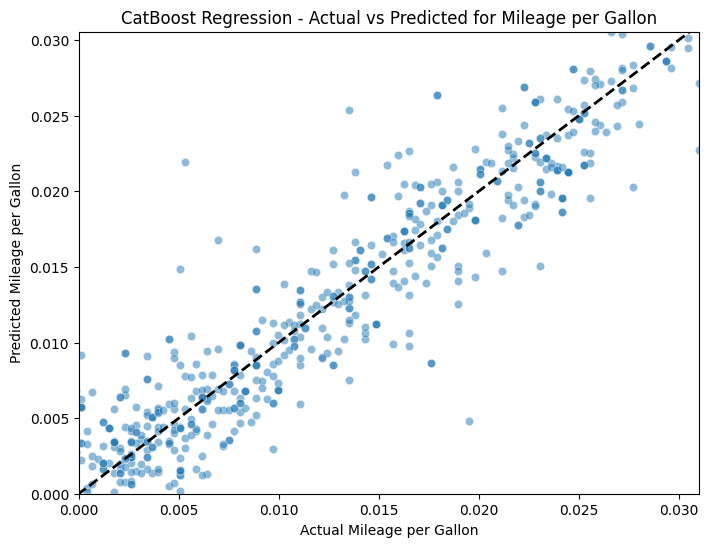

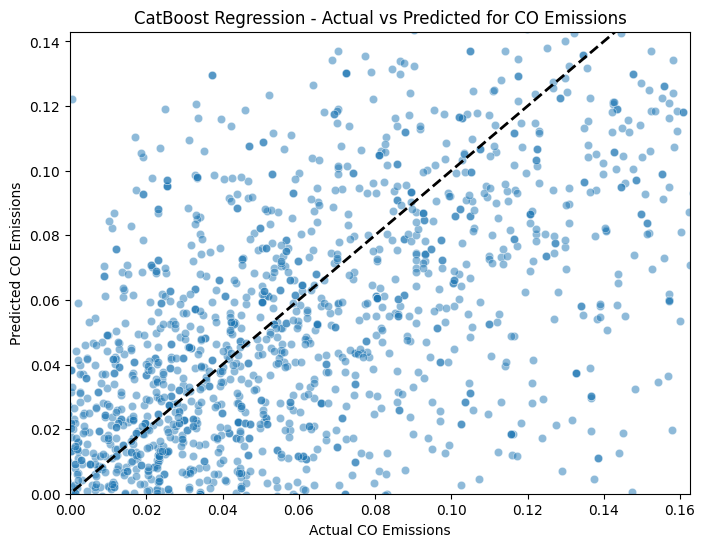

In [44]:
from catboost import CatBoostRegressor

cat_model_1 = CatBoostRegressor(verbose=0, random_state=42)
cat_model_2 = CatBoostRegressor(verbose=0, random_state=42)

# Train and predict for rnd_adj_fe
cat_model_1.fit(X_train_1, y_train_1)
y_pred_cat_1 = cat_model_1.predict(X_test_1)
r_score_cat_1 = cat_model_1.score(X_test_1, y_test_1)

# Train and predict for co
cat_model_2.fit(X_train_2, y_train_2)
y_pred_cat_2 = cat_model_2.predict(X_test_2)
r_score_cat_2 = cat_model_2.score(X_test_2, y_test_2)

print("CatBoost model R^2 score for rnd_adj_fe:", r_score_cat_1)
print("CatBoost model R^2 score for co:", r_score_cat_2)

plot_actual_vs_predicted(y_test_1, y_pred_cat_1, "CatBoost Regression", "Mileage per Gallon")
plot_actual_vs_predicted(y_test_2, y_pred_cat_2, "CatBoost Regression", "CO Emissions")

#### Hyperparameter Tuning for CatBoost

In [14]:
cat_param_grid = {
    "iterations": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "depth": [4, 6, 8]
}

# CatBoost for RND_ADJ_FE
cat_model_1 = GridSearchCV(CatBoostRegressor(verbose=0, random_state=42), cat_param_grid, cv=3, scoring="r2", n_jobs=-1)
cat_model_1.fit(X_train_1, y_train_1)
cat_model_1_best = cat_model_1.best_estimator_
cat_model_1_results = pd.DataFrame(cat_model_1.cv_results_)

# CatBoost for CO
cat_model_2 = GridSearchCV(CatBoostRegressor(verbose=0, random_state=42), cat_param_grid, cv=3, scoring="r2", n_jobs=-1)
cat_model_2.fit(X_train_2, y_train_2)
cat_model_2_best = cat_model_2.best_estimator_
cat_model_2_results = pd.DataFrame(cat_model_2.cv_results_)

print("Best parameters for CatBoost (RND_ADJ_FE):", cat_model_1.best_params_)
print("Best R^2 for CatBoost (RND_ADJ_FE):", cat_model_1.best_score_)
display(cat_model_1_results)

print("Best parameters for CatBoost (CO):", cat_model_2.best_params_)
print("Best R^2 for CatBoost (CO):", cat_model_2.best_score_)
display(cat_model_2_results)

Best parameters for CatBoost (RND_ADJ_FE): {'depth': 4, 'iterations': 200, 'learning_rate': 0.2}
Best R^2 for CatBoost (RND_ADJ_FE): 0.9671497589160896


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.562240,1.916807,0.036471,0.010142,4,100,0.01,"{'depth': 4, 'iterations': 100, 'learning_rate...",0.727545,0.632380,0.670328,0.676751,0.039115,16
1,5.885258,0.481729,0.043023,0.014658,4,100,0.10,"{'depth': 4, 'iterations': 100, 'learning_rate...",0.974811,0.889362,0.939063,0.934412,0.035039,8
2,4.990421,2.240930,0.035936,0.000933,4,100,0.20,"{'depth': 4, 'iterations': 100, 'learning_rate...",0.988860,0.915867,0.980883,0.961870,0.032692,2
3,9.816832,2.450612,0.035987,0.011777,4,200,0.01,"{'depth': 4, 'iterations': 200, 'learning_rate...",0.876599,0.786932,0.835126,0.832886,0.036640,14
4,9.485150,3.321498,0.041804,0.006752,4,200,0.10,"{'depth': 4, 'iterations': 200, 'learning_rate...",0.984548,0.906582,0.957340,0.949490,0.032310,4
5,10.412756,1.736541,0.039247,0.003915,4,200,0.20,"{'depth': 4, 'iterations': 200, 'learning_rate...",0.993223,0.918887,0.989339,0.967150,0.034164,1
6,6.706454,2.119156,0.032125,0.003902,6,100,0.01,"{'depth': 6, 'iterations': 100, 'learning_rate...",0.709926,0.620750,0.616542,0.649072,0.043064,17
7,9.058733,0.170448,0.031383,0.008319,6,100,0.10,"{'depth': 6, 'iterations': 100, 'learning_rate...",0.977311,0.905039,0.958951,0.947100,0.030672,5
8,9.171103,0.166005,0.036627,0.002862,6,100,0.20,"{'depth': 6, 'iterations': 100, 'learning_rate...",0.969055,0.893402,0.950512,0.937657,0.032195,7
9,17.843928,5.358978,0.053218,0.001032,6,200,0.01,"{'depth': 6, 'iterations': 200, 'learning_rate...",0.903147,0.798080,0.812859,0.838029,0.046439,13


Best parameters for CatBoost (CO): {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}
Best R^2 for CatBoost (CO): 0.8276678463769542


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.789646,1.155753,0.030126,0.001924,4,100,0.01,"{'depth': 4, 'iterations': 100, 'learning_rate...",0.531028,0.313793,0.617358,0.487393,0.127713,18
1,6.116691,0.164714,0.042402,0.003355,4,100,0.10,"{'depth': 4, 'iterations': 100, 'learning_rate...",0.907133,0.496577,0.966956,0.790222,0.209070,10
2,5.441153,0.480119,0.035043,0.005727,4,100,0.20,"{'depth': 4, 'iterations': 100, 'learning_rate...",0.902294,0.500083,0.972995,0.791791,0.208278,8
3,7.357367,3.235661,0.038428,0.013243,4,200,0.01,"{'depth': 4, 'iterations': 200, 'learning_rate...",0.757954,0.429036,0.844989,0.677327,0.179127,15
4,8.173807,3.292032,0.033338,0.010659,4,200,0.10,"{'depth': 4, 'iterations': 200, 'learning_rate...",0.903647,0.498274,0.972413,0.791445,0.209195,9
5,10.509134,1.922669,0.035952,0.010669,4,200,0.20,"{'depth': 4, 'iterations': 200, 'learning_rate...",0.906266,0.501030,0.976629,0.794642,0.209593,7
6,6.392493,2.027476,0.036054,0.007690,6,100,0.01,"{'depth': 6, 'iterations': 100, 'learning_rate...",0.544998,0.315003,0.621998,0.494000,0.130415,17
7,6.875394,3.074763,0.038125,0.008211,6,100,0.10,"{'depth': 6, 'iterations': 100, 'learning_rate...",0.909422,0.501000,0.988110,0.799510,0.213509,6
8,8.769113,0.749432,0.039813,0.004594,6,100,0.20,"{'depth': 6, 'iterations': 100, 'learning_rate...",0.871634,0.500132,0.981728,0.784498,0.206039,12
9,13.773091,4.905221,0.047264,0.015295,6,200,0.01,"{'depth': 6, 'iterations': 200, 'learning_rate...",0.787211,0.430872,0.850641,0.689575,0.184754,14


## Step 3. Model Evaluation
After hyperparameter tuning, best models were evaluated on the test data using the following metrics:
- R-squared (R2)
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary of models trained on RND_ADJ_FE and CO emissions
models_1 = [linear_model_1, knn_model_1_best, rf_model_1_best, gb_model_1_best, xgb_model_1_best, cat_model_1_best]
models_2 = [linear_model_2, knn_model_2_best, rf_model_2_best, gb_model_2_best, xgb_model_2_best, cat_model_2_best]
model_names = ["Linear Regression", "K-Nearest Neighbors", "Random Forest", "Gradient Boosting", "XGBoost", "CatBoost"]

results_1 = []
results_2 = []

# Evaluate each model on RND_ADJ_FE
for model, name in zip(models_1, model_names):
    y_pred = model.predict(X_test_1)
    r2 = r2_score(y_test_1, y_pred)
    mae = mean_absolute_error(y_test_1, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_1, y_pred))
    results_1.append({"Model": name, "Target var": "RND_ADJ_FE", "R-squared": r2, "MAE": mae, "RMSE": rmse})

# Evaluate each model on CO emissions
for model, name in zip(models_2, model_names):
    y_pred = model.predict(X_test_2)
    r2 = r2_score(y_test_2, y_pred)
    mae = mean_absolute_error(y_test_2, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_2, y_pred))
    results_2.append({"Model": name, "Target var": "CO Emissions", "R-squared": r2, "MAE": mae, "RMSE": rmse})

results_df = pd.concat([pd.DataFrame(results_1), pd.DataFrame(results_2)], ignore_index=True)
display(results_df)

,Model,Target var,R-squared,MAE,RMSE
0,Linear Regression,RND_ADJ_FE,-0.011424,0.073076,0.560470
1,K-Nearest Neighbors,RND_ADJ_FE,0.000222,0.015204,0.557234
2,Random Forest,RND_ADJ_FE,0.079936,0.016279,0.534558
3,Gradient Boosting,RND_ADJ_FE,0.723925,0.013776,0.292819
4,XGBoost,RND_ADJ_FE,0.814837,0.011539,0.239808
5,CatBoost,RND_ADJ_FE,0.644640,0.013798,0.332216
6,Linear Regression,CO Emissions,0.007923,0.094259,1.341723
7,K-Nearest Neighbors,CO Emissions,0.999002,0.009553,0.042560
8,Random Forest,CO Emissions,0.907063,0.019964,0.410662
9,Gradient Boosting,CO Emissions,0.921057,0.043716,0.378484


## Step 4. Feature Importance

The feature importance of the best models (Random Forest, Gradient Boosting, XGBoost, CatBoost) was analyzed to understand the key factors that influence fuel efficiency and CO emissions.


Feature Importances for Random Forest (RND_ADJ_FE):


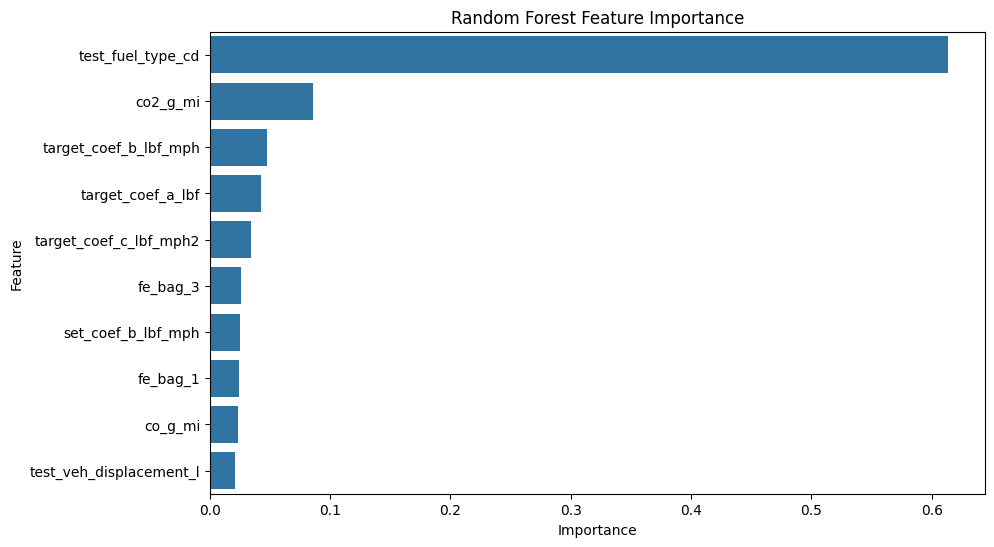


Feature Importances for Gradient Boosting (RND_ADJ_FE):


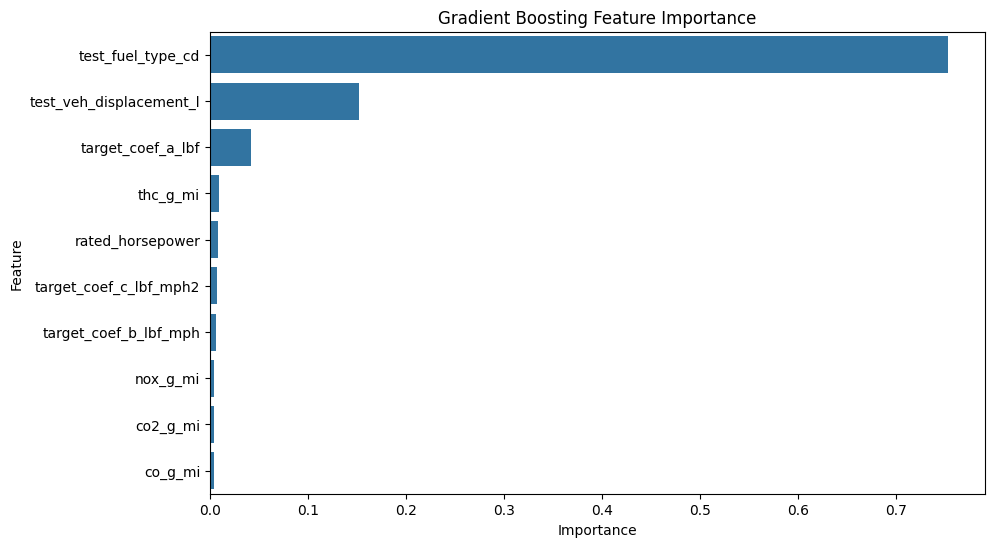


Feature Importances for XGBoost (RND_ADJ_FE):


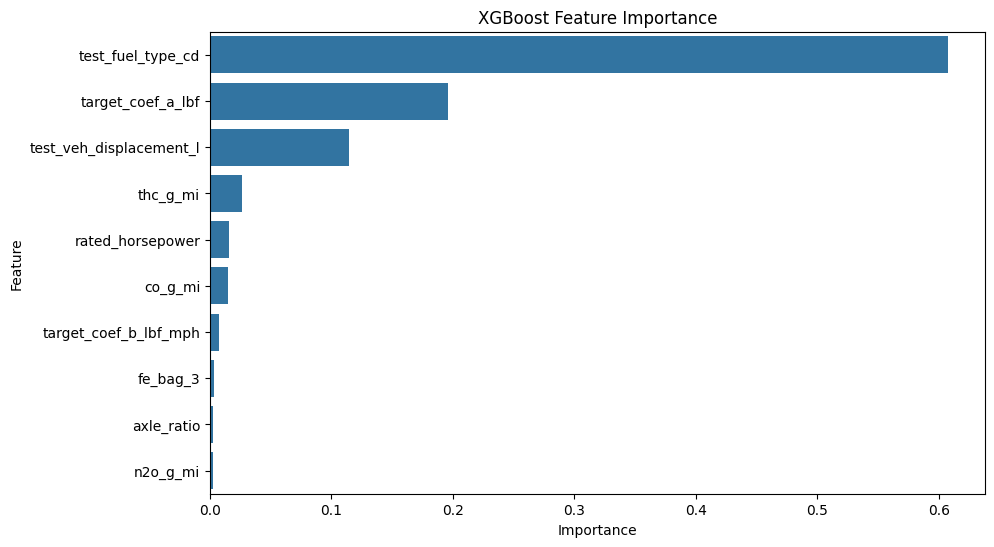


Feature Importances for CatBoost (RND_ADJ_FE):


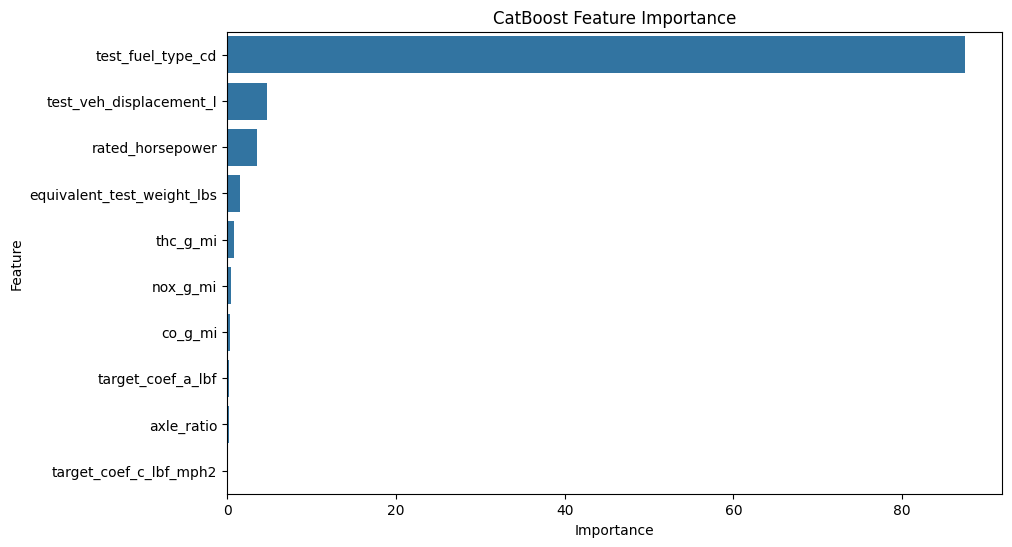


Feature Importances for Random Forest (CO Emissions):


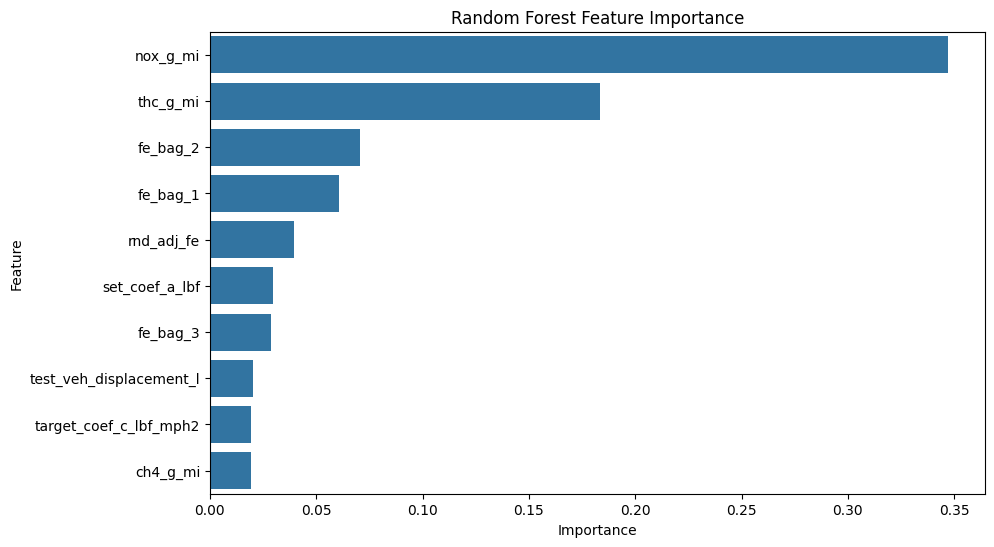


Feature Importances for Gradient Boosting (CO Emissions):


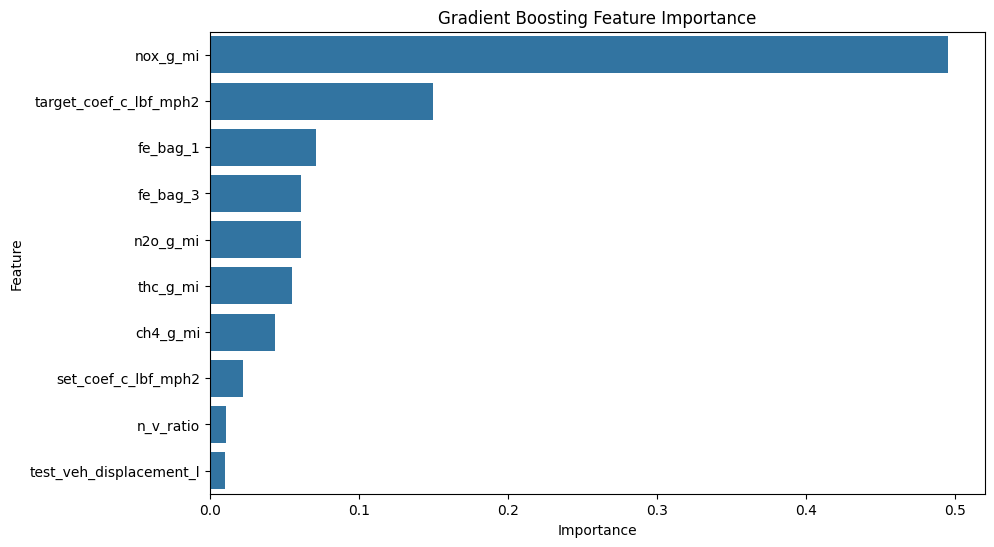


Feature Importances for XGBoost (CO Emissions):


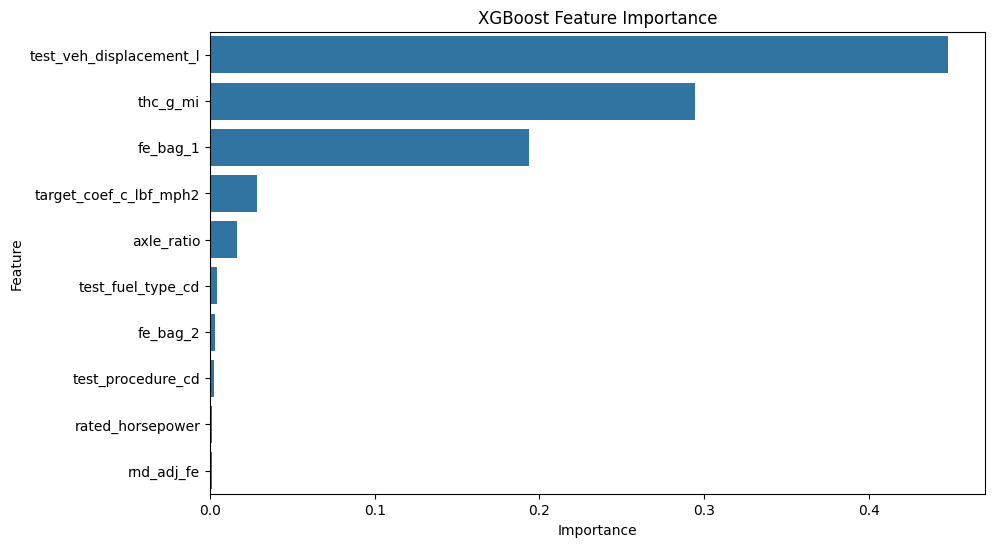


Feature Importances for CatBoost (CO Emissions):


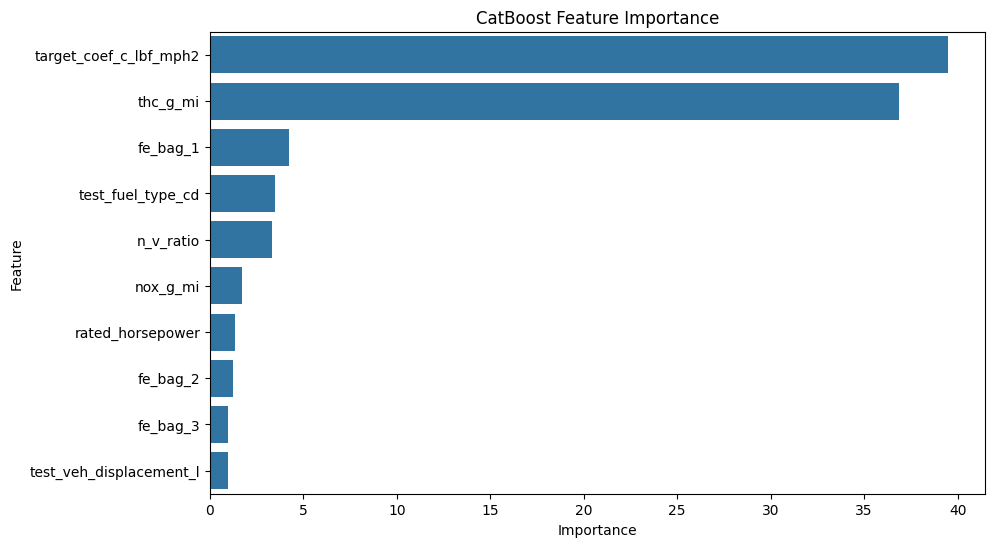

In [ ]:
def plot_feature_importance(model, X_train: pd.DataFrame, model_name: str) -> None:
    """
    Plot the feature importance of a model.

    Args:
        model: The trained model.
        X_train: The training data.
        model_name: The name of the model.
    """

    if hasattr(model, "feature_importances_"):
        feature_importance_df = pd.DataFrame({
            "Feature": X_train.columns,
            "Importance": model.feature_importances_
        }).sort_values(by="Importance", ascending=False)

        # Plot the top 10 features
        plt.figure(figsize=(10, 6))
        sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10))
        plt.title(f"{model_name} Feature Importance")
        plt.show()
    else:
        print("Model does not support feature importances.")

models_1 = [rf_model_1_best, gb_model_1_best, xgb_model_1_best, cat_model_1_best]
models_2 = [rf_model_2_best, gb_model_2_best, xgb_model_2_best, cat_model_2_best]
model_names = ["Random Forest", "Gradient Boosting", "XGBoost", "CatBoost"]

# Extract feature importance for each tree-based model on RND_ADJ_FE
for model, name in zip(models_1, model_names):  
    print(f"\nFeature Importances for {name} (RND_ADJ_FE):")
    plot_feature_importance(model, X_train_1, name)

# Feature importance for CO emissions
for model, name in zip(models_2, model_names):
    print(f"\nFeature Importances for {name} (CO Emissions):")
    plot_feature_importance(model, X_train_2, name)

## Step 5. Results Comparison <a id="5"></a>

In this final step, we review and interpret the performance of each model for the two target variables (`RND_ADJ_FE` and `CO` emissions). We compare the models' predictive performance using evaluation metrics (R², MAE, RMSE) and analyze the feature importance to understand which features most significantly impact predictions. This analysis aims to identify the best models and uncover key insights into the factors influencing fuel efficiency and emissions.

---

#### Model Performance Summary

1. **Predicting `RND_ADJ_FE` (Mileage per Gallon)**:
   - **Best Model**: **XGBoost** outperformed all other models with an **R² score of 0.8148**, indicating that it explains over 81% of the variance in fuel efficiency. This high score suggests that XGBoost effectively captures the complex relationships between vehicle characteristics and fuel efficiency.
   - **Other Strong Performers**:
     - **Gradient Boosting** performed well with an **R² score of 0.7239**. Although slightly lower than XGBoost, this model is also effective in capturing non-linear relationships, making it a solid choice for predicting mileage.
     - **CatBoost** and **Random Forest** achieved moderate performance, with R² scores around 0.60-0.70. These models captured some variance in the data but were less accurate than XGBoost and Gradient Boosting, possibly due to limitations in handling specific nuances in the fuel efficiency data.
   - **Poor Performers**:
     - **Linear Regression** and **K-Nearest Neighbors** both had low R² scores, indicating that they were not well-suited for predicting `RND_ADJ_FE`. Linear Regression, with its assumption of linear relationships, struggled with this dataset, while K-Nearest Neighbors was likely limited by the complexity of the data's underlying patterns.

   **Interpretation**: The high performance of **XGBoost** and **Gradient Boosting** suggests that **non-linear relationships and interactions between features** significantly impact fuel efficiency. The poor performance of Linear Regression indicates that a purely linear approach is insufficient for this dataset. Overall, **ensemble models**, especially those using gradient boosting, excel in capturing these complexities, making them the best choice for predicting `RND_ADJ_FE`.

2. **Predicting `CO` Emissions**:
   - **Best Models**:
     - **K-Nearest Neighbors** achieved near-perfect accuracy with an **R² score of 0.9990**, indicating that it closely matches actual values and is highly accurate in predicting `CO` emissions.
     - **CatBoost** also performed exceptionally well, with an **R² score of 0.9953**. CatBoost’s ability to handle categorical features and interactions makes it a strong choice for predicting emissions.
   - **Other Strong Performers**:
     - **Gradient Boosting** and **Random Forest** also demonstrated high accuracy, with **R² scores above 0.90**. These ensemble methods capture complex relationships within the emissions data, although they were slightly less precise than KNN and CatBoost.
   - **Poor Performer**:
     - **Linear Regression** had the lowest R² score, showing it could not effectively model the emissions data, likely due to its simplicity and inability to capture non-linear relationships.

   **Interpretation**: The high accuracy of **K-Nearest Neighbors** and **CatBoost** suggests that `CO` emissions may be highly influenced by specific categorical and continuous features, which these models effectively utilize. K-Nearest Neighbors' performance indicates that emissions data may have local patterns where similar vehicle types or conditions result in similar emissions. **CatBoost** and **Gradient Boosting** models' success emphasizes the importance of handling non-linear relationships in emissions prediction.

---

#### Feature Importance Summary

To better understand which factors influence `RND_ADJ_FE` and `CO` emissions, we examine feature importance scores from the tree-based models (Random Forest, Gradient Boosting, XGBoost, and CatBoost). This analysis helps identify the key variables that the models relied on for predictions.

1. **Key Features for `RND_ADJ_FE` (Mileage per Gallon)**:
   - **Most Influential Features**:
     - `test_veh_displacement_l` (engine displacement) and `rated_horsepower` were consistently identified as top features across all models. This finding aligns with the understanding that larger engines and higher horsepower generally consume more fuel, thus impacting mileage per gallon.
     - `equivalent_test_weight_lbs` also emerged as a key predictor. Heavier vehicles often require more fuel to operate, affecting fuel efficiency.
   - **Other Influential Features**:
     - **Fuel type**: Certain models placed importance on features related to fuel type, indicating that specific fuel types may impact fuel consumption patterns differently.
   - **Model Differences**:
     - While the top features were largely consistent, **XGBoost** and **Gradient Boosting** assigned higher importance to `rated_horsepower` than Random Forest. This suggests that certain non-linear models may prioritize performance characteristics (like horsepower) more heavily in predicting fuel efficiency.

   **Interpretation**: The consistent importance of features like **engine displacement, vehicle weight, and horsepower** highlights their role in determining fuel efficiency. These features provide a physical basis for fuel consumption patterns, with larger and more powerful engines generally leading to reduced efficiency. **Feature consistency** across models strengthens confidence in these variables as reliable predictors of `RND_ADJ_FE`.

---

### Feature Importance Interpretation for CO Emissions

The charts provided illustrate the top features influencing the prediction of CO emissions for each of the tree-based models (Random Forest, Gradient Boosting, XGBoost, and CatBoost). Each model assigns importance differently based on how it captures relationships in the data, but some common influential features stand out.

1. **Random Forest**:
   - The feature `nox_g_mi` (NOx emissions per mile) has the highest importance, indicating a strong correlation between NOx and CO emissions. This makes sense from an emissions perspective, as NOx and CO are often by-products of combustion.
   - `thc_g_mi` (Total Hydrocarbons per mile) also shows significant importance, suggesting that vehicles emitting more hydrocarbons tend to have higher CO emissions.
   - Features related to fuel efficiency, like `fe_bag_2` and `fe_bag_1`, appear in the top factors, which could reflect the impact of driving conditions and fuel consumption on CO emissions.
   - Other important factors include `md_adj_fe` (adjusted fuel efficiency) and `set_coef_a_lbf` (aerodynamic drag coefficient), which relate to vehicle performance characteristics that may indirectly influence CO emissions.

2. **Gradient Boosting**:
   - Similar to Random Forest, `nox_g_mi` is the most important feature, reinforcing its strong relationship with CO emissions.
   - `target_coef_c_lbf_mph2` (another aerodynamic-related coefficient) ranks high, highlighting the importance of vehicle aerodynamics and design in emissions output.
   - `fe_bag_1` and `fe_bag_3` also appear as key features, further linking driving conditions and fuel efficiency measures to CO emissions.
   - Features like `n2o_g_mi` (N2O emissions per mile) and `ch4_g_mi` (methane emissions per mile) are relatively important, which may indicate the presence of other pollutants can be predictive of CO levels.

3. **XGBoost**:
   - XGBoost places the highest importance on `test_veh_displacement_l` (vehicle engine displacement), suggesting that larger engines might correlate with higher CO emissions due to increased fuel consumption.
   - `thc_g_mi` and `fe_bag_1` are also significant, consistent with previous models, showing the impact of hydrocarbon emissions and fuel efficiency measures.
   - Other features, such as `target_coef_c_lbf_mph2` and `axle_ratio`, reflect aspects of vehicle design that could affect emissions.
   - `test_fuel_type_cd` (fuel type code) also appears in the top factors, indicating that CO emissions might vary depending on the type of fuel used.

4. **CatBoost**:
   - CatBoost emphasizes `target_coef_c_lbf_mph2` as the most important feature, suggesting a strong link between vehicle aerodynamics and CO emissions.
   - `thc_g_mi` ranks highly, consistent with the other models in indicating that hydrocarbon emissions correlate with CO emissions.
   - Fuel efficiency metrics like `fe_bag_1` and `test_fuel_type_cd` are also significant, aligning with the idea that CO emissions are impacted by both driving conditions and fuel type.
   - Additional features, such as `n_v_ratio` (a ratio related to vehicle speed and efficiency), `nox_g_mi`, and `rated_horsepower`, highlight the role of vehicle performance and fuel efficiency characteristics in predicting emissions.

---

#### Summary and Insights

- **Best Models**:
  - For predicting **`RND_ADJ_FE`**: **XGBoost** emerged as the top model, handling the complex interactions in fuel efficiency data effectively.
  - For predicting **`CO` emissions**: **K-Nearest Neighbors** and **CatBoost** achieved near-perfect accuracy, likely due to their ability to capture specific emission patterns effectively.

- **Feature Importance Consistency**:
  - Key features for fuel efficiency included **engine displacement, horsepower, and vehicle weight**, while emissions were influenced by **CO2, NOx, and fuel type**. The consistency of these features across models suggests they are reliable predictors, providing a strong basis for interpreting the model outputs.

- **Insights on Model Performance**:
  - **Ensemble models** (XGBoost, Gradient Boosting, CatBoost) excelled in capturing non-linear relationships in `RND_ADJ_FE`, while **K-Nearest Neighbors** effectively identified local emission patterns in `CO` data.
  - The poor performance of **Linear Regression** for both targets indicates that simpler models are insufficient for this dataset, which benefits from the complexity handled by advanced algorithms.

### Overall Conclusions

This analysis shows that predicting `RND_ADJ_FE` and `CO` emissions requires complex models capable of handling non-linear relationships and interactions. Ensemble methods and K-Nearest Neighbors were highly effective, capturing nuanced relationships in the data. Feature importance analysis highlighted key predictors (e.g., displacement, CO2) that are consistent with real-world domain knowledge, strengthening confidence in these models' predictive capabilities and interpretability.
  